# Regression Model
## Prediction of vehicules Prices :)
- Importing data

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



sns.set(style='whitegrid', context='notebook')
df = pd.read_csv('./Dataset/ML_cars.csv')
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [50]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## PRE-ETL

- Removing some no-relevant columns for the analysis

In [52]:
##### Columns to remove -> car_ID | CarName 
# Create a new column -> vehicule_volume = carlength * carwidth * carheight
df = df.drop(['car_ID', 'CarName'], axis=1)
df['vehicule_volume'] = df['carlength'] * df['carwidth'] * df['carheight']
df = df.drop(['carlength', 'carwidth', 'carheight'], axis=1) # Remove the 3 columns integrated in vehicule_volume
df.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,vehicule_volume
0,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904
1,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904


## EDA 
- Target variable

This is the median -> 10295.0 and this is the mean -> 13276.710570731706


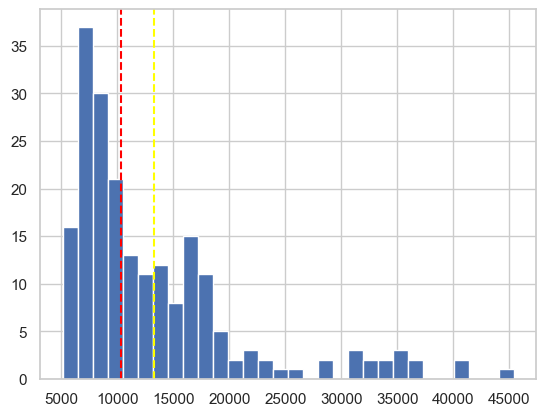

In [53]:
df.price.hist(bins=30)
median_price = df.price.median()
mean_price = df.price.mean()
print(f'This is the median -> {median_price} and this is the mean -> {mean_price}')
plt.axvline(x=median_price, color='red', linestyle='--')  # We see the median in a red a line
plt.axvline(x=mean_price, color='yellow', linestyle='--')  # We see the mean in a yellow a line
plt.show()

- Looking for atypical values

the limit is 29575.5


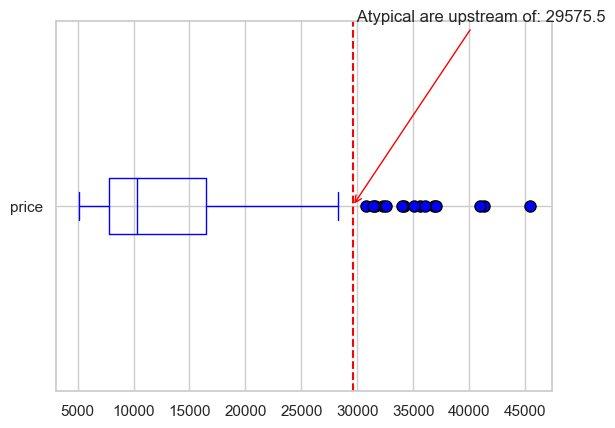

In [54]:
# some stats
q1,q3 = np.percentile(df.price, [25,75])
iqr = q3-q1
limit = q3 + (1.5 * iqr)
print(f'the limit is {limit}')
df.boxplot(column='price', color='blue', vert=False, 
           flierprops=dict(marker='o', markerfacecolor='blue', markersize=8))
plt.axvline(x=limit, color='red', linestyle='--')
# add annotation to the plot
plt.annotate(f' Atypical are upstream of: {limit:.1f}', xy=(limit, 1), xytext=(limit+2, 1.5),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=12)
# show plot
plt.show()


- Spliting *Numeric and categorical*

In [55]:
# We split the data in 2 dataframes (numeric and categorical)
df_numeric = df.select_dtypes(exclude = 'object') # numeric
df_categorical = df.select_dtypes(include=['object']).join(df[['price']]) # categorical

In [56]:
df_numeric.head(2)

,symboling,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,vehicule_volume
0,3,88.6,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904
1,3,88.6,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904


In [57]:
df_categorical.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0


## EDA 
- *numeric*

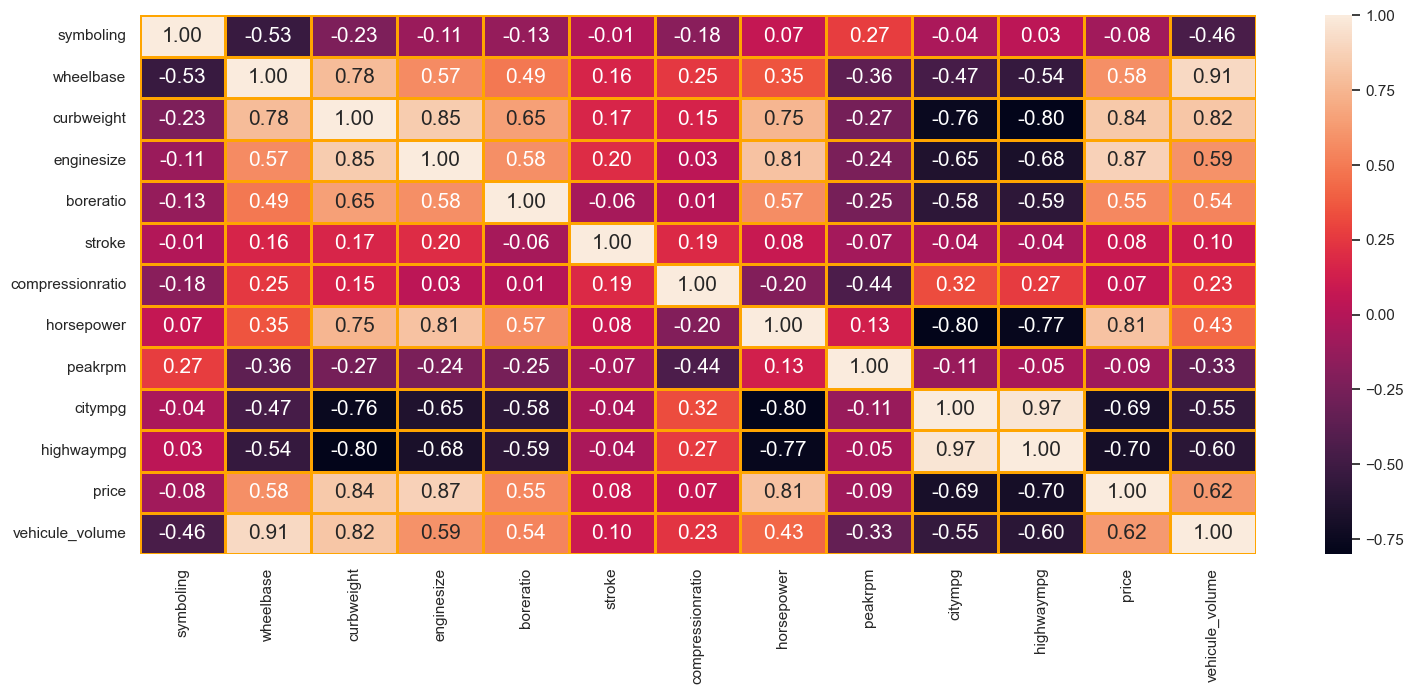

In [58]:
plt.figure(figsize = (18, 7))
sns.heatmap(df_numeric.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

Insights from the plot:

- citympg and highwaympg have high multicollinearity
- wheelbase increase as volume and curbweight
- negative realtion between curbweigth, enginezize, boreratio and highwaympg | citympg


## EDA 
- *categorical*

In [59]:
count = 0
for col in df_categorical.columns:
    if df_categorical[col].dtypes == 'object':
        count +=1
        print(col + ": " + str(df_categorical[col].unique()))
print('\n')
print(f'There are {count} categorical variables')
    



fueltype: ['gas' 'diesel']
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


There are 9 categorical variables


### *Do categrical data affect on price?*

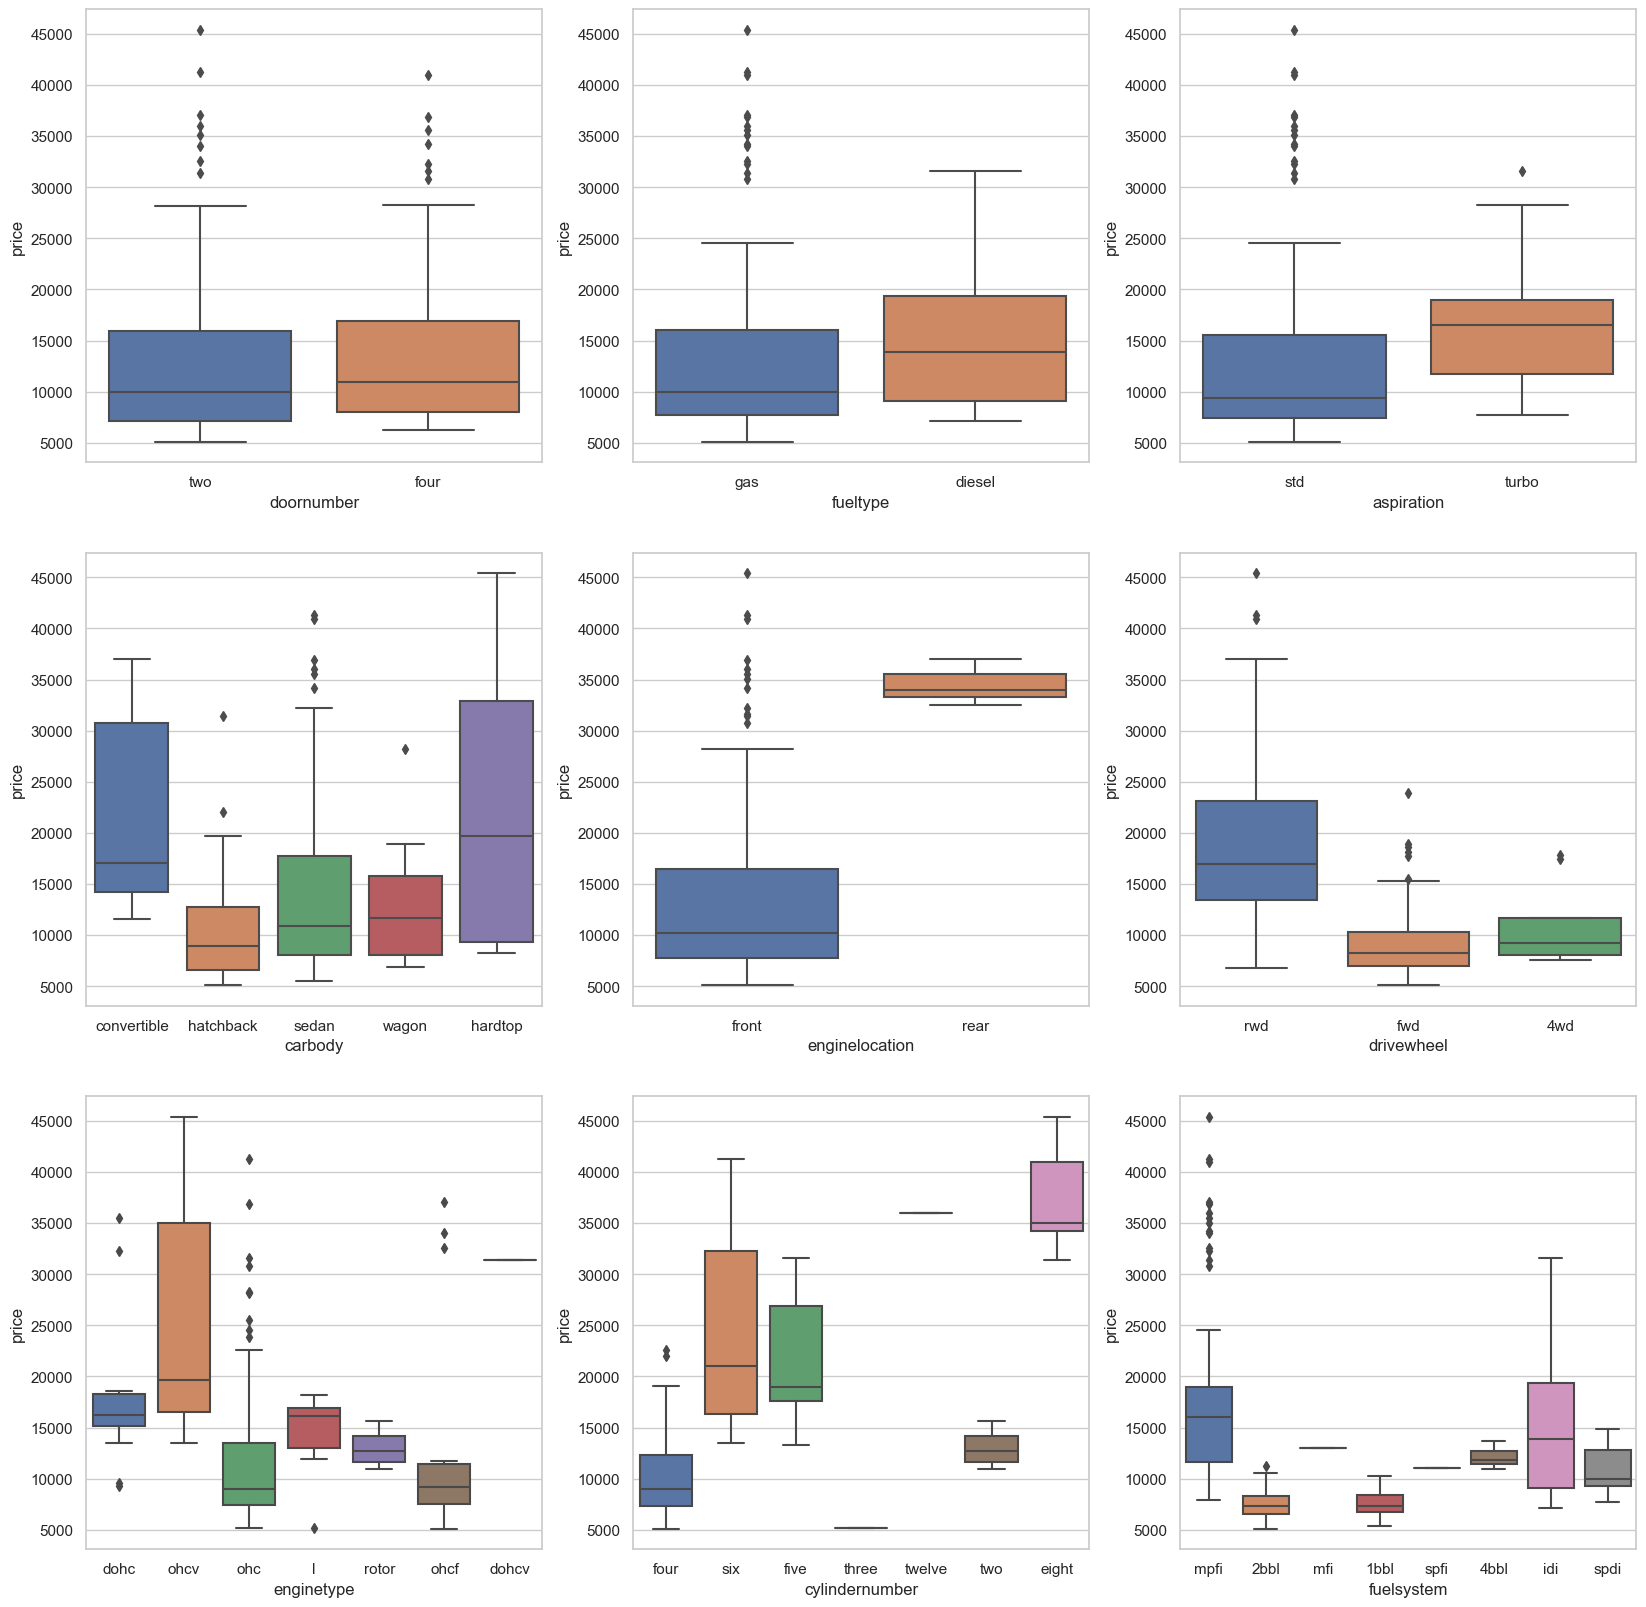

In [60]:
plt.figure(figsize=(20, 20))
columns=['doornumber','fueltype','aspiration','carbody','enginelocation','drivewheel','enginetype','cylindernumber','fuelsystem']
i=0
for col in columns:
    i=i+1
    plt.subplot(3,3,i)
    sns.boxplot(x = col, y = 'price', data = df)
plt.show()

Insights from the plot:

- doornumber apparently are weakly-determinant in final price
- Cars with disel feul type has an expensive price than gas ones.
- Cars with turbo has an expensive price than gas ones.
- Convertible and hardtop tend to have more expensive prices
- normally engine is in a front location but if rear-location is for expensive cars
- rwd has higher prices to the other drivewheels
- Aparrently ohcv is used only in costly cars.
- constly cars has 8 cilinders

In [61]:
df[df.price> 36000]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,vehicule_volume
16,0,gas,std,two,sedan,rwd,front,103.5,3380,ohc,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,706639.374
17,0,gas,std,four,sedan,rwd,front,110.0,3505,ohc,...,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0,786358.990
73,0,gas,std,four,sedan,rwd,front,120.9,3900,ohcv,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,846007.659
74,1,gas,std,two,hardtop,rwd,front,112.0,3715,ohcv,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,794568.960
128,3,gas,std,two,convertible,rwd,rear,89.5,2800,ohcf,...,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0,566490.600


#### EDA 2

In [62]:
# from pandas_profiling import ProfileReport
# ProfileReport(df)

## Data Proccesing
- *Encoding Ordinal categorical columns in df_categorical*

In [63]:
df_categorical['doornumber'] = df_categorical['doornumber'].map({'two': 2, 'four': 4})
df_categorical['cylindernumber'] = df_categorical['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [64]:
df_categorical.head(4)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,gas,std,2,convertible,rwd,front,dohc,4,mpfi,13495.0
1,gas,std,2,convertible,rwd,front,dohc,4,mpfi,16500.0
2,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,16500.0
3,gas,std,4,sedan,fwd,front,ohc,4,mpfi,13950.0


- Adding *dummies columns*

In [65]:
X = df_categorical.drop(columns = 'price', axis = 1)
y = df_categorical['price']

In [66]:
X = pd.get_dummies(X, drop_first = True)
df_categorical = X
df_categorical.head(2)


,doornumber,cylindernumber,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,2,4,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2,4,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


- Joining the 2 dataframes

In [69]:
df = (pd.concat([df_categorical, df_numeric], axis=1))

In [70]:
df.head(2)

,doornumber,cylindernumber,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,...,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,vehicule_volume
0,2,4,1,0,0,0,0,0,0,1,...,130,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904
1,2,4,1,0,0,0,0,0,0,1,...,130,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904


## Modelling

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [72]:
X_cols = list(set(df.columns)-set(['price']))
y_col = ['price']

X = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 8)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

# scaling data

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

# fit the model
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [73]:
y_pred.shape

(62, 1)

## Evaluating the model

In [74]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.8669
mse:  0.0939


## Suggestions 
- It is necessary to have more data for some variables to have a greater model

Authors: 

- Ari (*Henry student*)
- Fredo (*Henry student*)